In [24]:
import pandas as pd
import missingno as msno
import seaborn as sns

In [25]:
usdars = 155.06

In [26]:
data = pd.read_csv(r'properatti.csv', delimiter = ',', index_col=0)
#df.head()
data.shape

(121220, 25)

In [27]:
data.columns.values

array(['operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name',
       'geonames_id', 'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail'], dtype=object)

<AxesSubplot:>

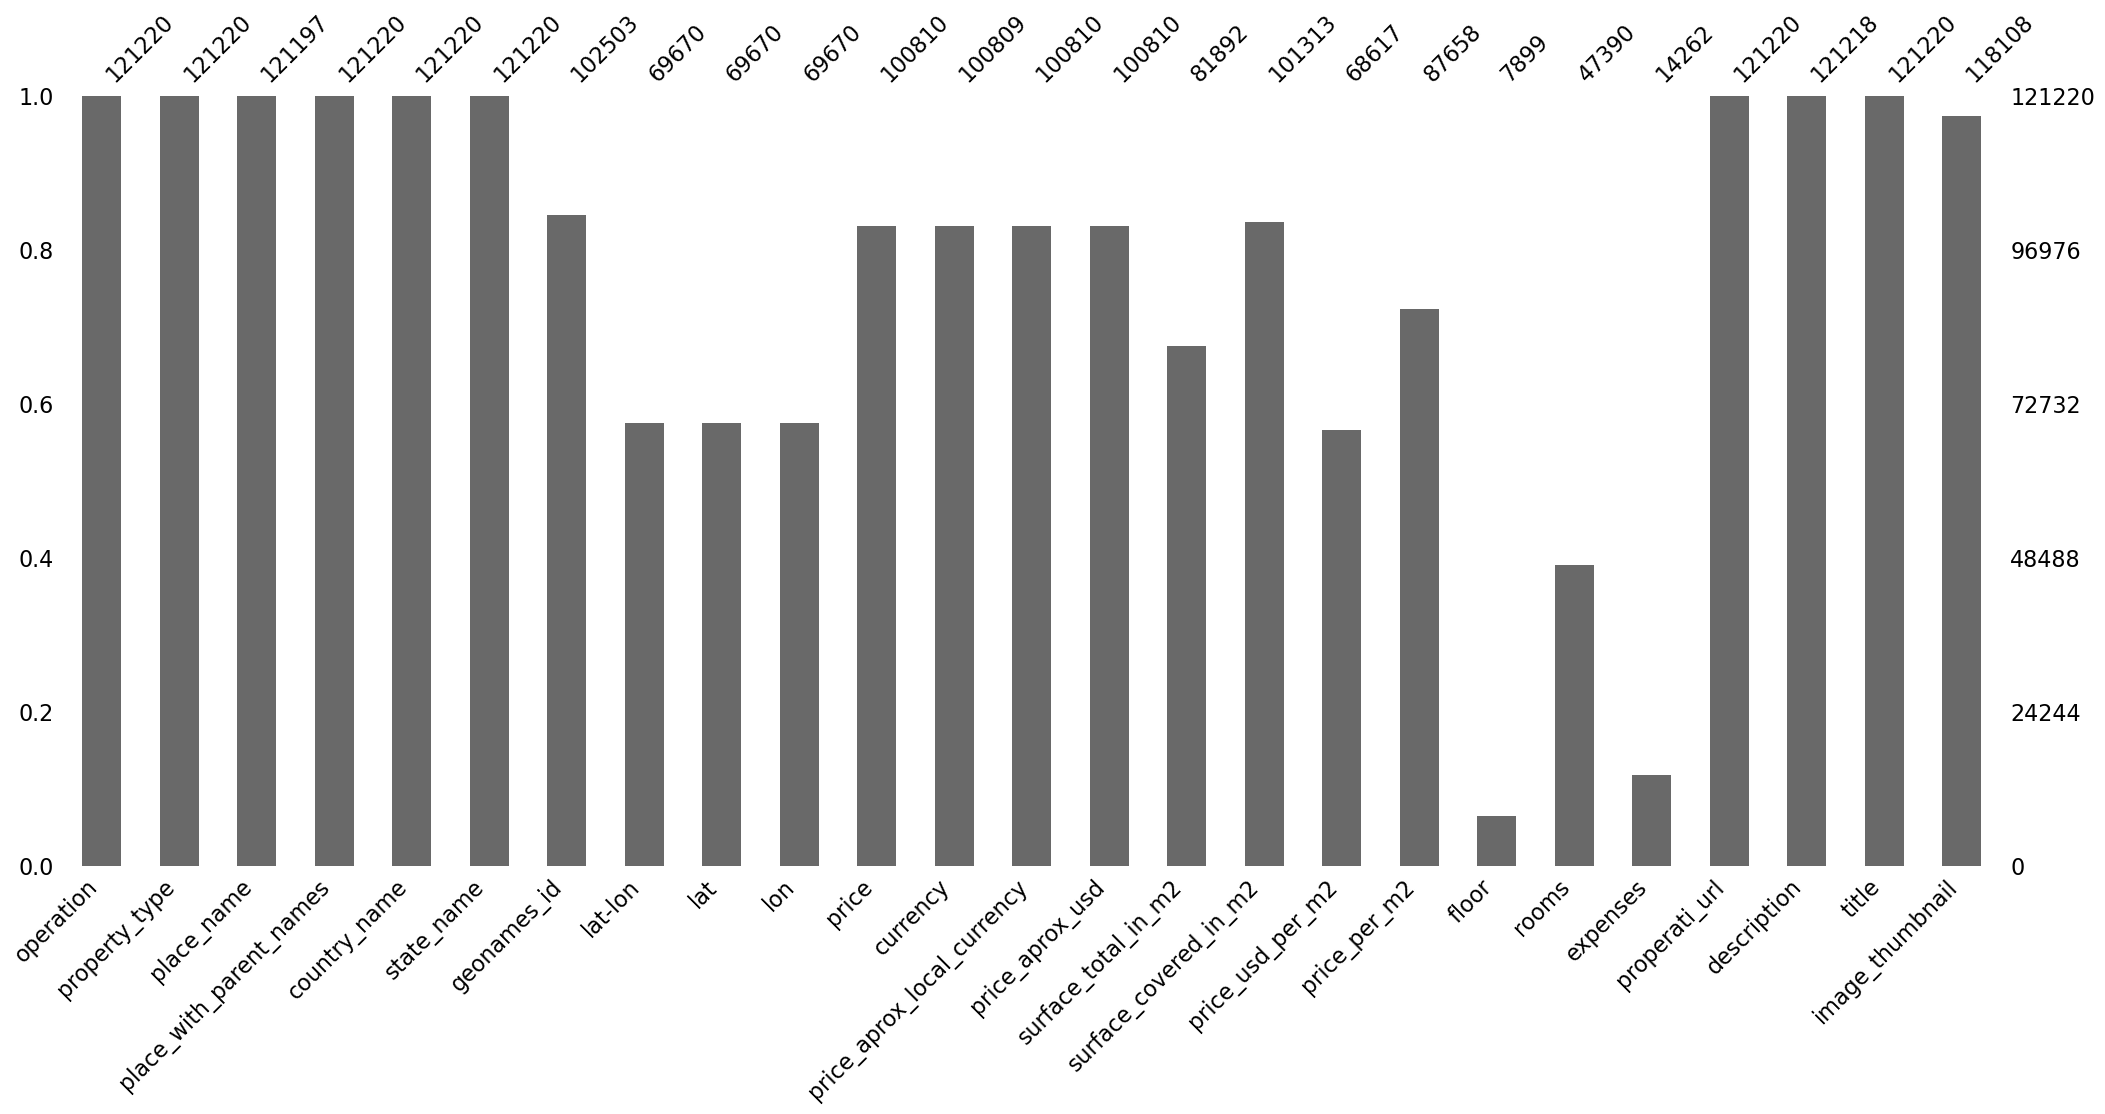

In [28]:
# Para saber valores no nulos

msno.bar(data)

In [29]:
# Nombre de las columnas
print(data.columns)

data['operation'].value_counts()

Index(['operation', 'property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail'],
      dtype='object')


sell    121220
Name: operation, dtype: int64

In [30]:
for i in data.columns:
    print(i, ":")
    print(data[i].value_counts(), "\n")


operation :
sell    121220
Name: operation, dtype: int64 

property_type :
apartment    71065
house        40268
PH            5751
store         4136
Name: property_type, dtype: int64 

place_name :
Córdoba                          9254
Rosario                          8504
Mar del Plata                    6534
Tigre                            3324
Nordelta                         3315
                                 ... 
Laguna Paiva                        1
San Esteban                         1
coordenadas 34.255511               1
Barrio Cerrado "La Escondida"       1
General Pinto                       1
Name: place_name, Length: 1060, dtype: int64 

place_with_parent_names :
|Argentina|Santa Fe|Rosario|                                                8504
|Argentina|Córdoba|Córdoba|                                                 6606
|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|                      6534
|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nordelta|               

1. Lectura del dataframe.
    1.1 Descripción breve del contenido de las columnas (Moises)
2. Conocer valores no nulos por columna. 
3. Conocer la variabilidad de cada columna ----- (Eliminar columnas : operation, country_name). 
4. Determinar columnas a completar los valores faltantes y el método a considerar. 
    4.1 Completar columnas geonames_id, lat, long (Santiago) 
    4.2 Completar columnas con datos faltantes a partir de ReGEX construidas con información en columnas title y description (William y Moises)


In [31]:
# Eliminar columnas con valores únicos en descripción
data.drop(['operation', 'country_name'], axis = 1, inplace = True)
data.shape

(121220, 23)

In [32]:
data.head(3)

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,lat,lon,price,currency,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


In [33]:
# Dropeamos 'floor'
data.drop(['floor'], axis = 1, inplace = True)

In [34]:
data.head(3)

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,lat,lon,price,currency,...,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses,properati_url,description,title,image_thumbnail
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,...,55.0,40.0,1127.272727,1550.000000,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,...,55.0,55.0,1309.090909,1309.090909,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


In [35]:
data.drop(['properati_url', 'expenses'], axis = 1, inplace = True)

<AxesSubplot:>

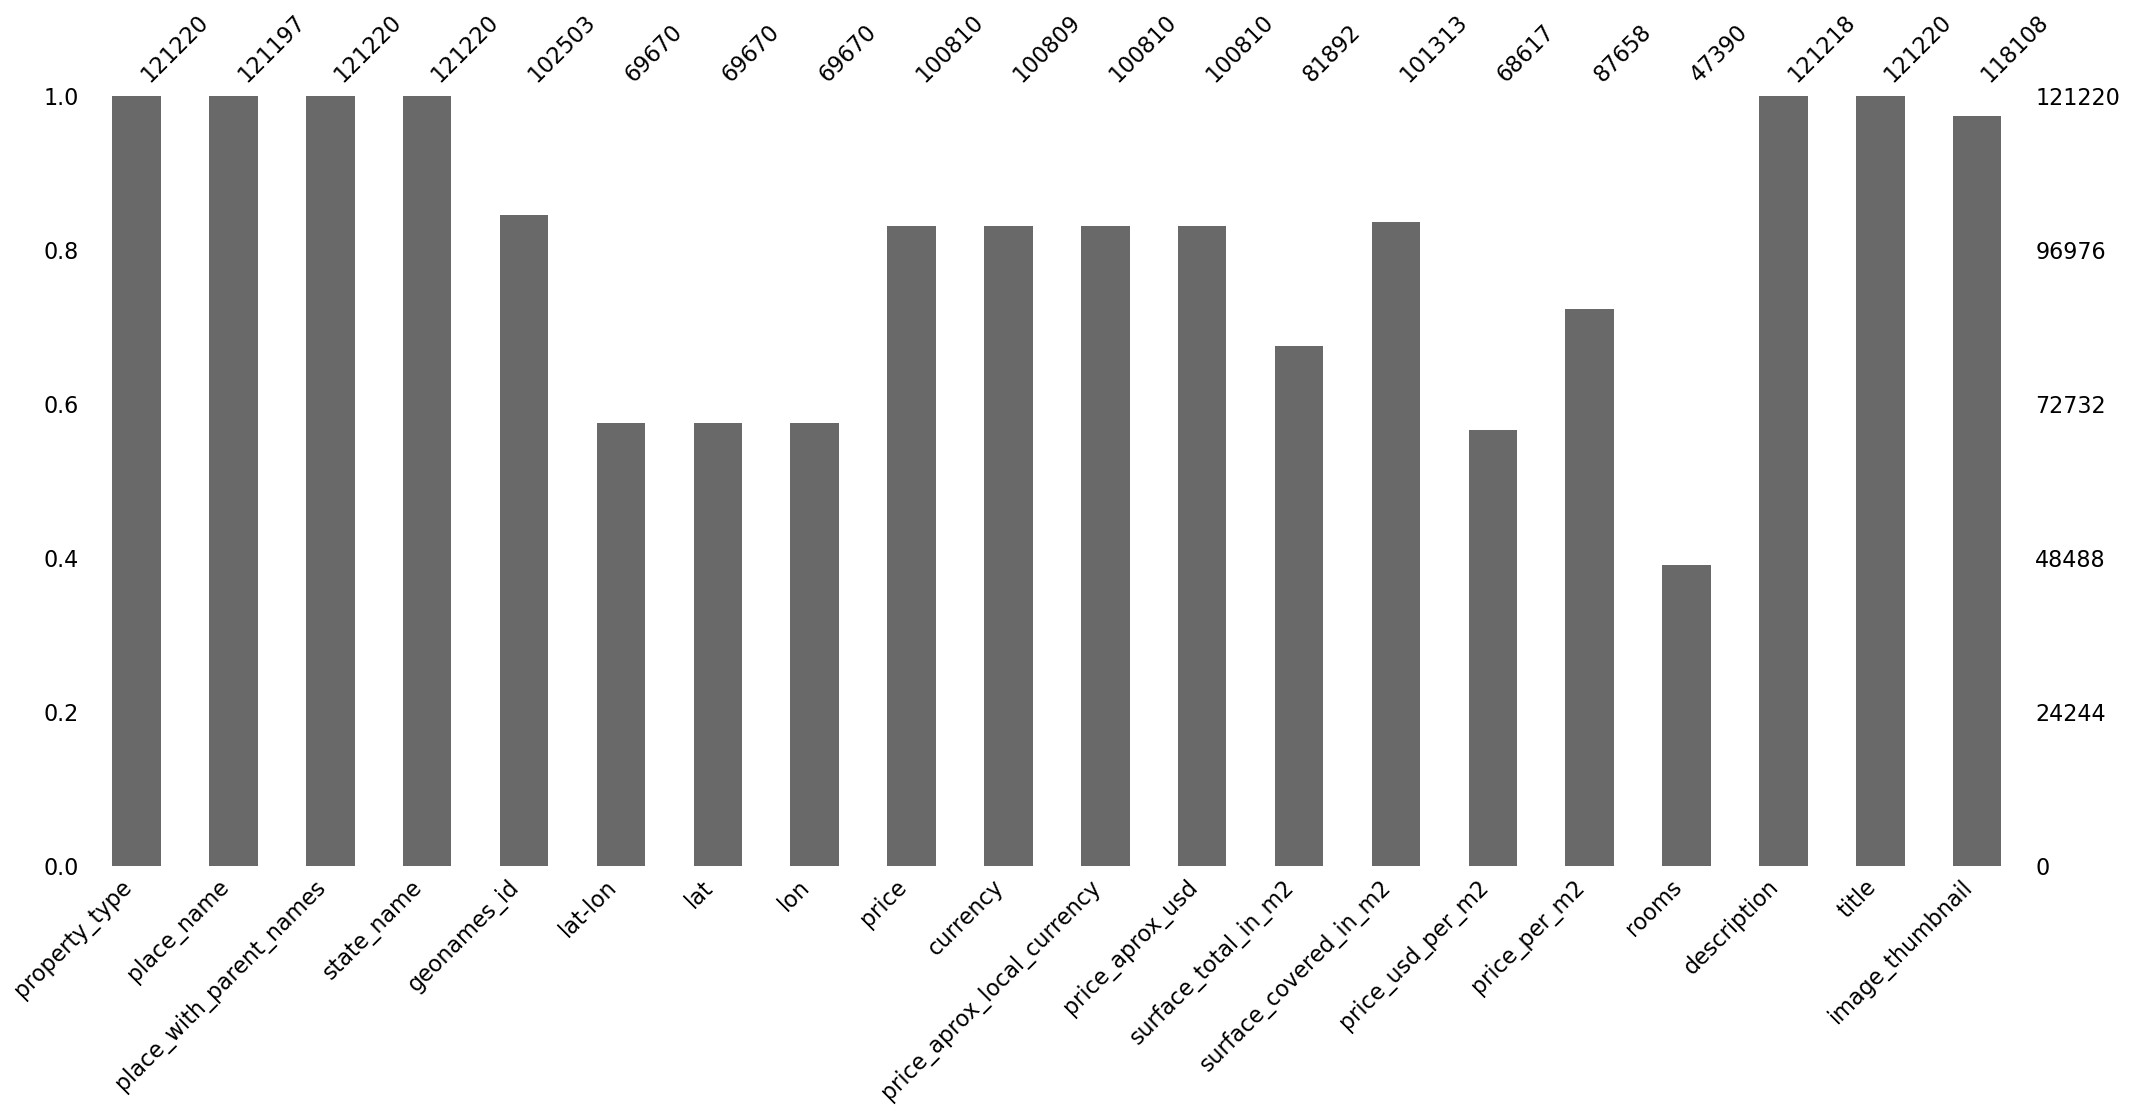

In [36]:
msno.bar(data)

In [37]:
data.drop(['lat-lon',
           'lat', 'lon',
           'geonames_id',
           'image_thumbnail'],
          axis = 1,
          inplace = True)

<AxesSubplot:>

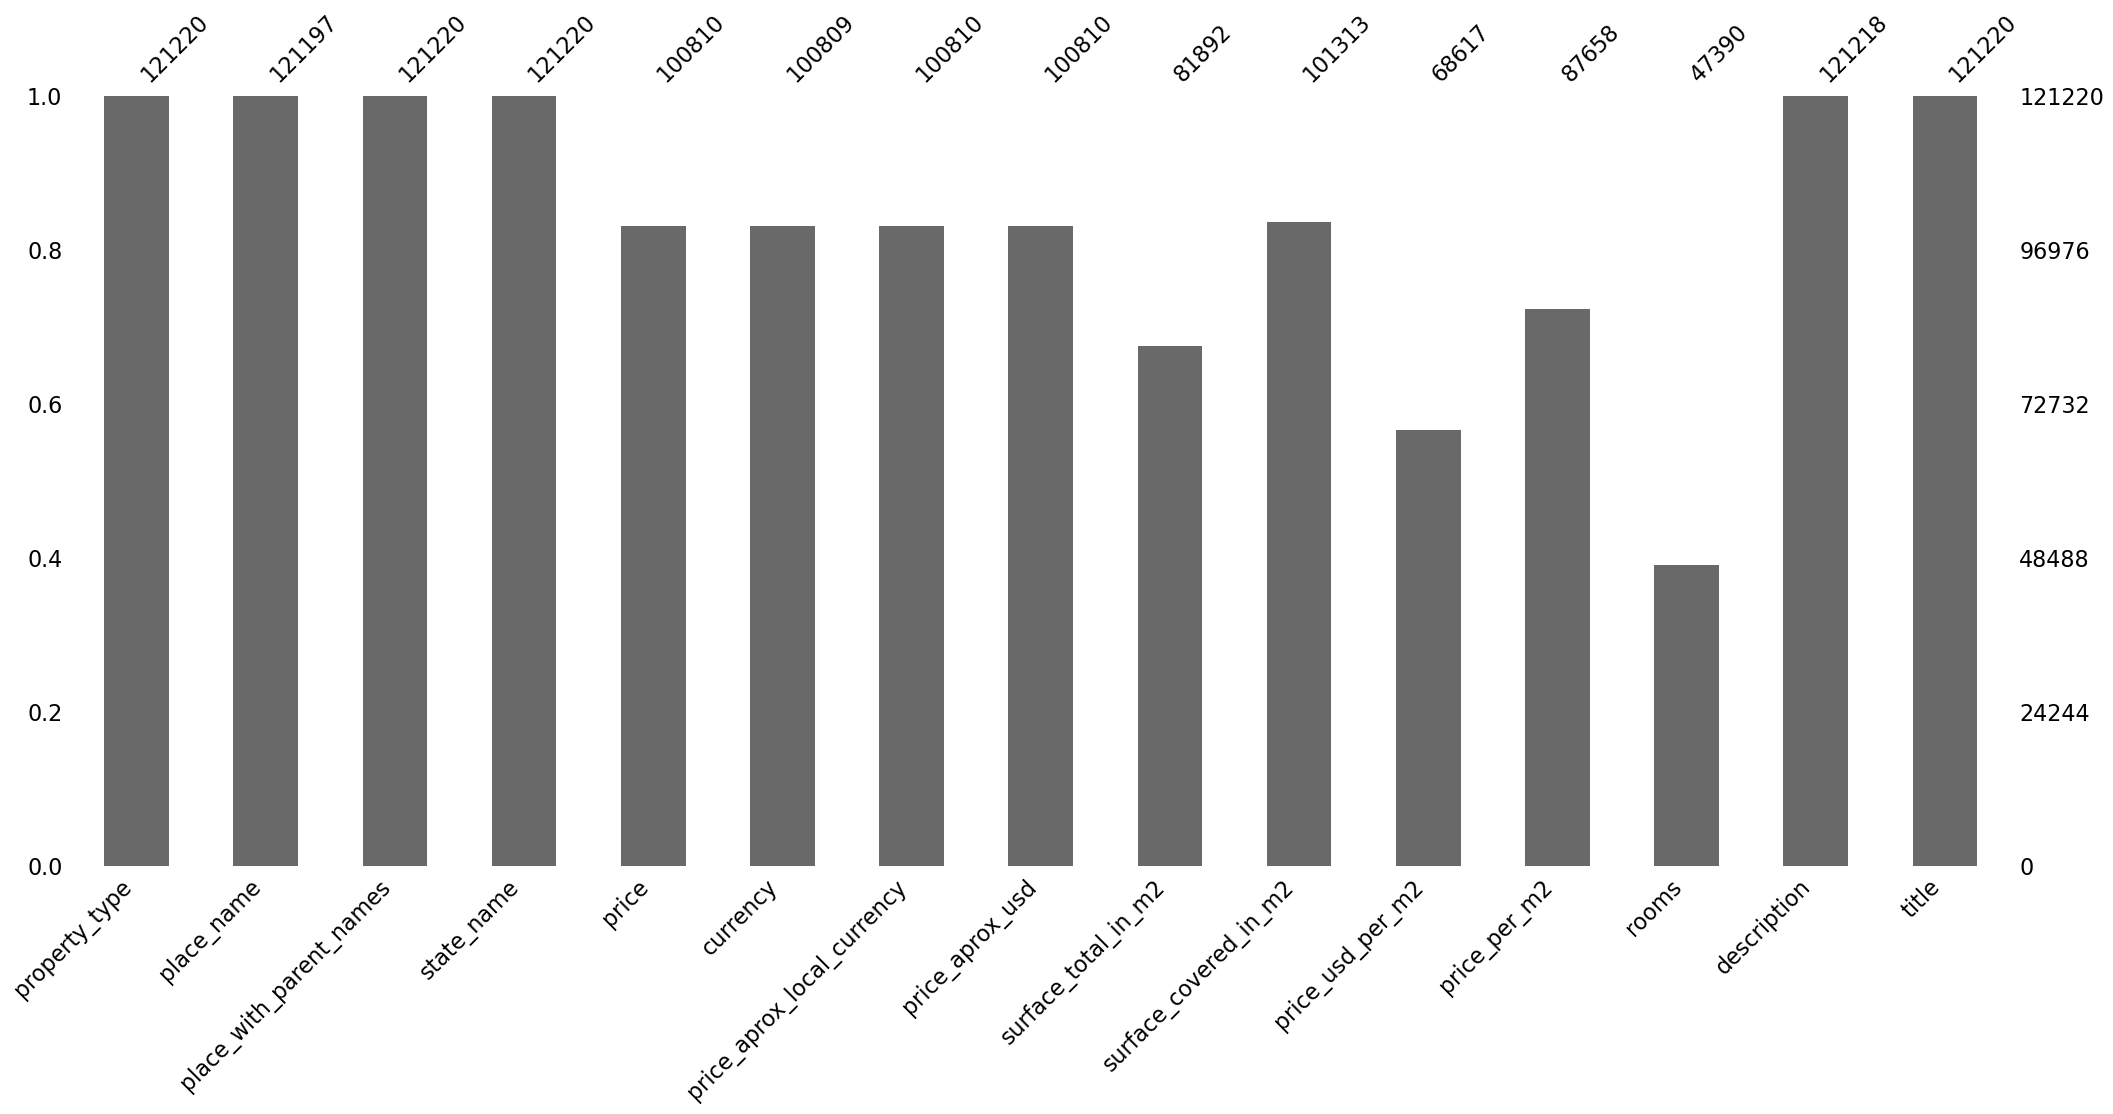

In [38]:
msno.bar(data)

<AxesSubplot:>

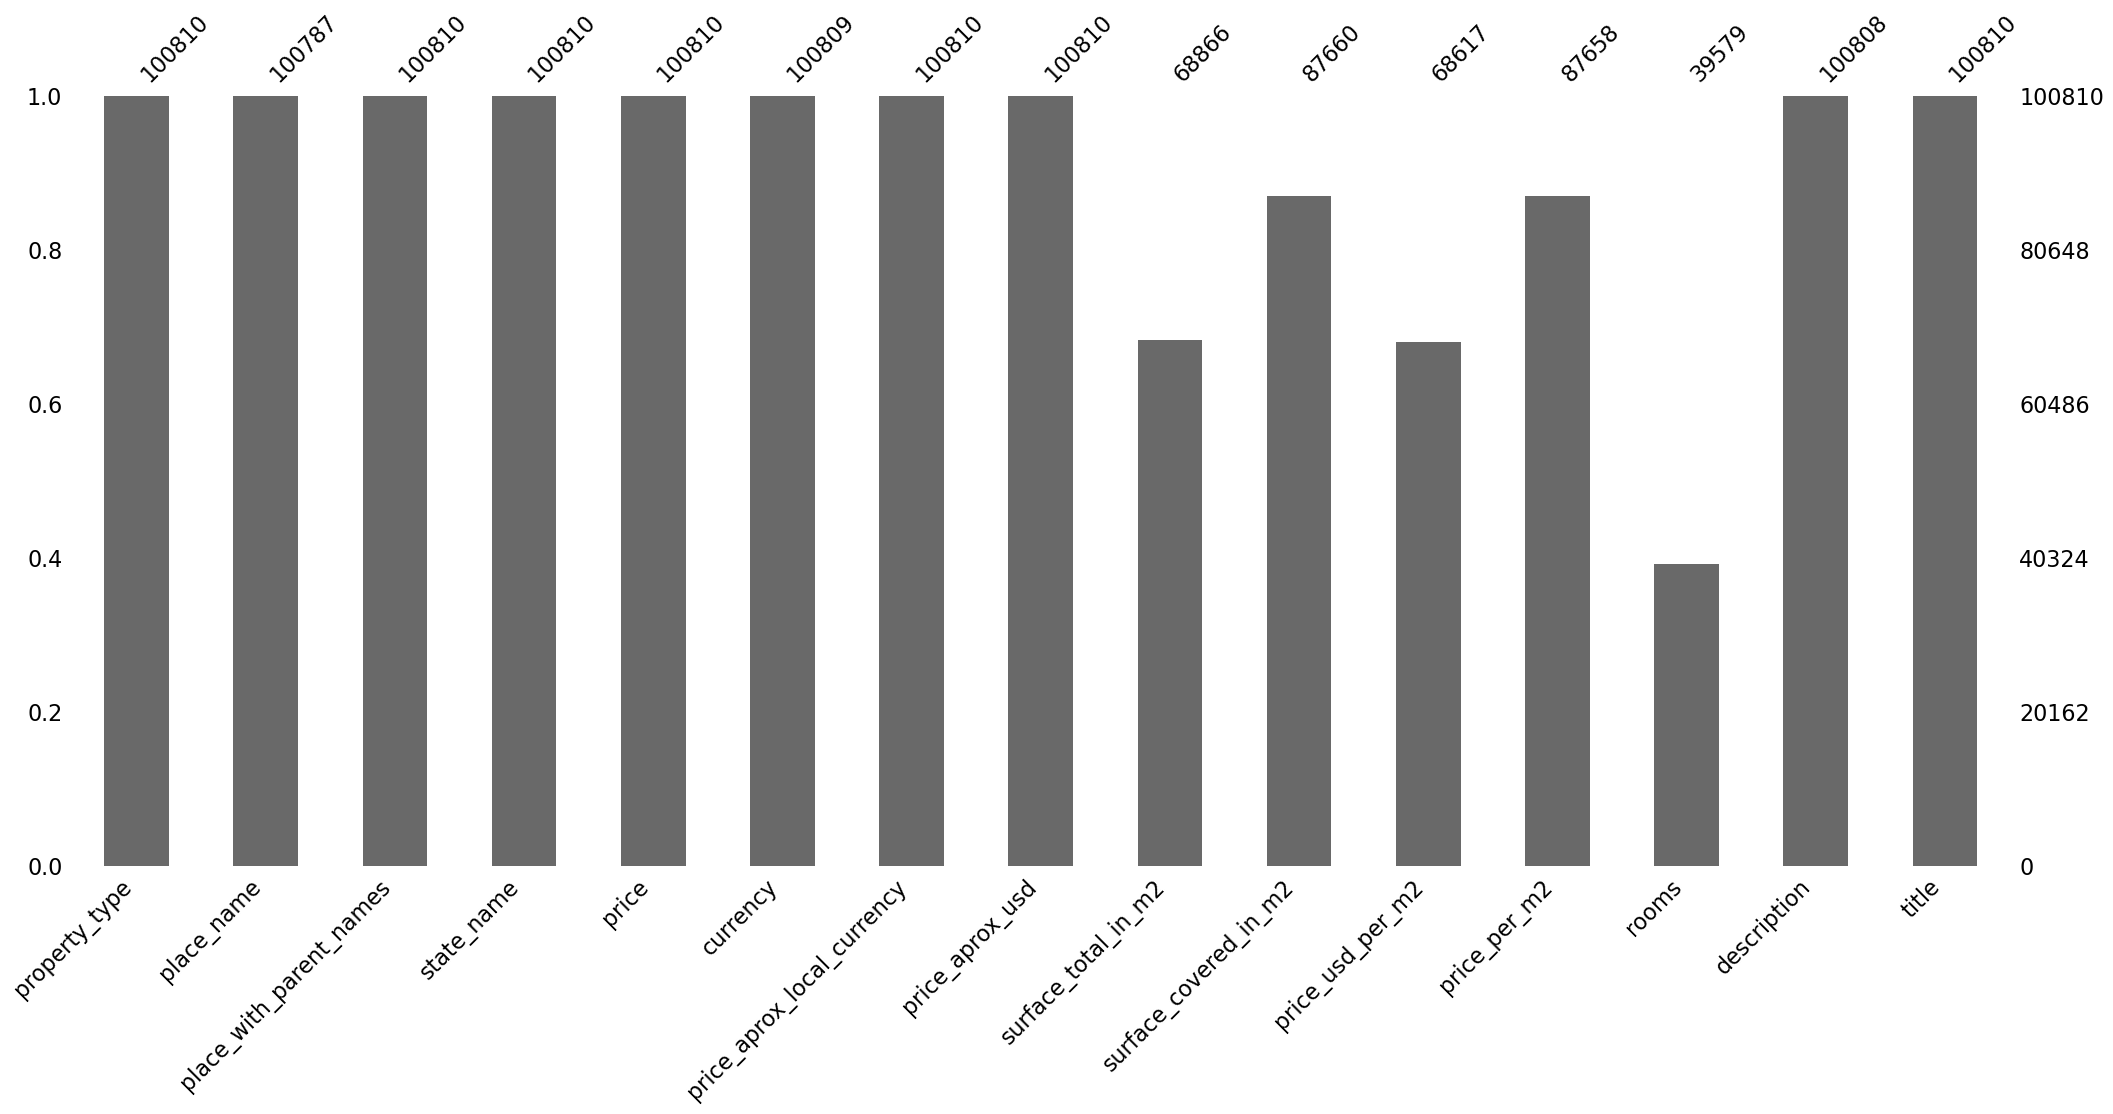

In [39]:
data = data[data['price'].notna()]
msno.bar(data)

In [40]:
data.sample(5)

,property_type,place_name,place_with_parent_names,state_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title
6723,house,San Fernando,|Argentina|Bs.As. G.B.A. Zona Norte|San Fernando|,Bs.As. G.B.A. Zona Norte,220000.0,USD,3881790.00,220000.0,486.0,170.0,452.674897,1294.117647,NaN,VENTA Casa Ideal para reciclar sobre 486 mts l...,"Casa 486m² con Plantas en Belgrano, Gral. 1800..."
111998,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|La ...,Bs.As. G.B.A. Zona Sur,70000.0,USD,1235115.00,70000.0,NaN,39.0,NaN,1794.871795,NaN,Departamento – Venta – Calle 05 entre 77 y 787...,Departamento - La Plata
54307,house,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Bs.As. G.B.A. Zona Norte,840000.0,USD,14821380.00,840000.0,350.0,350.0,2400.000000,2400.000000,NaN,***BARRIO NAUTICO | LOTE INTERNO | ESCRITURABL...,Bustamante Propiedades | Las Caletas en Venta
108232,apartment,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Bs.As. G.B.A. Zona Norte,350000.0,USD,6175575.00,350000.0,NaN,102.0,NaN,3431.372549,NaN,Departamento 3 ambientes + dependencia de serv...,Departamento - Miradores de la Bahia
76714,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,93994.0,USD,1658477.13,93994.0,32.0,28.0,2937.312500,3356.928571,NaN,PRE-VENTA DEPARTAMENTO DE 1 AMBIENTE EN BELGRA...,PRE-VENTA DEPARTAMENTO DE 1 AMBIENTE EN BELGRA...


In [41]:
data.sort_values('currency', inplace=True)
data


,property_type,place_name,place_with_parent_names,state_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title
37914,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,1000000.0,ARS,9.895683e+05,56083.67,40.0,40.0,1402.091750,25000.000000,2.0,UNIDAD UBICADA EN PLANTA BAJA.LIVING-COMEDOR A...,DEPARTAMENTO 1 DORMITORIO APTO CREDITO ZONA FA...
107654,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,1558768.0,ARS,1.542508e+06,87421.44,45.0,37.0,1942.698667,42128.864865,NaN,Sergio Villella Inmobiliaria presenta departam...,Departamento - Macrocentro
107653,apartment,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Bs.As. G.B.A. Zona Norte,2649146.0,ARS,2.621511e+06,148573.84,NaN,49.0,NaN,54064.204082,NaN,Proyecto único en pozo con financiación en pes...,Departamento - Los Castaños
107649,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,1185102.0,ARS,1.172739e+06,66464.87,33.0,30.0,2014.086970,39503.400000,NaN,Sergio Villella Inmobiliaria presenta departam...,Departamento - Macrocentro
16012,house,Pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|,Bs.As. G.B.A. Zona Norte,150000.0,ARS,1.484352e+05,8412.55,154.0,100.0,54.626948,1500.000000,NaN,"EXCELENTE ACCESO Y UBICACIÓN SUPERFICIE : 413,...",OPORTUNIDAD CASA EN VENTA EN LOS ARCES. LA CAÑ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43036,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Capital Federal,240000.0,USD,4.234680e+06,240000.00,NaN,57.0,NaN,4210.526316,4.0,"Venta - Departamento - Argentina, Buenos Aires...",Departamento en Venta ubicado en Palermo
43033,apartment,Martínez,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Bs.As. G.B.A. Zona Norte,120000.0,USD,2.117340e+06,120000.00,NaN,37.0,NaN,3243.243243,1.0,"Venta - Departamento - Argentina, Buenos Aires...",Departamento en Venta ubicado en Martínez
121219,apartment,Capital Federal,|Argentina|Capital Federal|,Capital Federal,129000.0,USD,2.276140e+06,129000.00,77.0,77.0,1675.324675,1675.324675,NaN,Departamento de 77 m2 apto profesional. Edific...,Departamento apto profesional en el Centro
107390,house,San Roque,|Argentina|Mendoza|San Roque|,Mendoza,650000000.0,UYU,4.054773e+08,22980378.29,NaN,NaN,NaN,NaN,NaN,"Casa con Calefacción central, Mendoza, San Roq...",Casa - San Vicente


In [42]:
# Notamos que los últimos 2 valores están en otras monedas por lo que las descartamos
data.drop(data.tail(2).index,inplace=True)
data

,property_type,place_name,place_with_parent_names,state_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title
37914,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,1000000.0,ARS,989568.31,56083.67,40.0,40.0,1402.091750,25000.000000,2.0,UNIDAD UBICADA EN PLANTA BAJA.LIVING-COMEDOR A...,DEPARTAMENTO 1 DORMITORIO APTO CREDITO ZONA FA...
107654,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,1558768.0,ARS,1542507.59,87421.44,45.0,37.0,1942.698667,42128.864865,NaN,Sergio Villella Inmobiliaria presenta departam...,Departamento - Macrocentro
107653,apartment,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Bs.As. G.B.A. Zona Norte,2649146.0,ARS,2621511.11,148573.84,NaN,49.0,NaN,54064.204082,NaN,Proyecto único en pozo con financiación en pes...,Departamento - Los Castaños
107649,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,1185102.0,ARS,1172739.39,66464.87,33.0,30.0,2014.086970,39503.400000,NaN,Sergio Villella Inmobiliaria presenta departam...,Departamento - Macrocentro
16012,house,Pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|,Bs.As. G.B.A. Zona Norte,150000.0,ARS,148435.23,8412.55,154.0,100.0,54.626948,1500.000000,NaN,"EXCELENTE ACCESO Y UBICACIÓN SUPERFICIE : 413,...",OPORTUNIDAD CASA EN VENTA EN LOS ARCES. LA CAÑ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43038,apartment,Balvanera,|Argentina|Capital Federal|Balvanera|,Capital Federal,137000.0,USD,2417296.50,137000.00,NaN,54.0,NaN,2537.037037,3.0,"Venta - Departamento - Argentina, Buenos Aires...",Departamento en Venta ubicado en Balvanera
43037,PH,Villa Devoto,|Argentina|Capital Federal|Villa Devoto|,Capital Federal,85000.0,USD,1499782.50,85000.00,NaN,42.0,NaN,2023.809524,2.0,"Venta - Departamento - Argentina, Buenos Aires...",Departamento en Venta ubicado en Villa Devoto
43036,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Capital Federal,240000.0,USD,4234680.00,240000.00,NaN,57.0,NaN,4210.526316,4.0,"Venta - Departamento - Argentina, Buenos Aires...",Departamento en Venta ubicado en Palermo
43033,apartment,Martínez,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Bs.As. G.B.A. Zona Norte,120000.0,USD,2117340.00,120000.00,NaN,37.0,NaN,3243.243243,1.0,"Venta - Departamento - Argentina, Buenos Aires...",Departamento en Venta ubicado en Martínez


In [43]:
# Vamos a analizar el precio, por ende usaremos la columna price_aprox_usd ya que en esta
# se encuentran todos los precios en dolares, mientras que en la columna price, hay en RS y USD

# Dropeamos los valores que se vuelven irrelevantes:
# price
# currency
# price_aprox_local_currency	
# price_usd_per_m2
# price_per_m2

data.drop(['price',
           'currency',
           'price_aprox_local_currency',
           'price_usd_per_m2', 
           'price_per_m2'], 
        axis = 1, 
        inplace = True)


<AxesSubplot:>

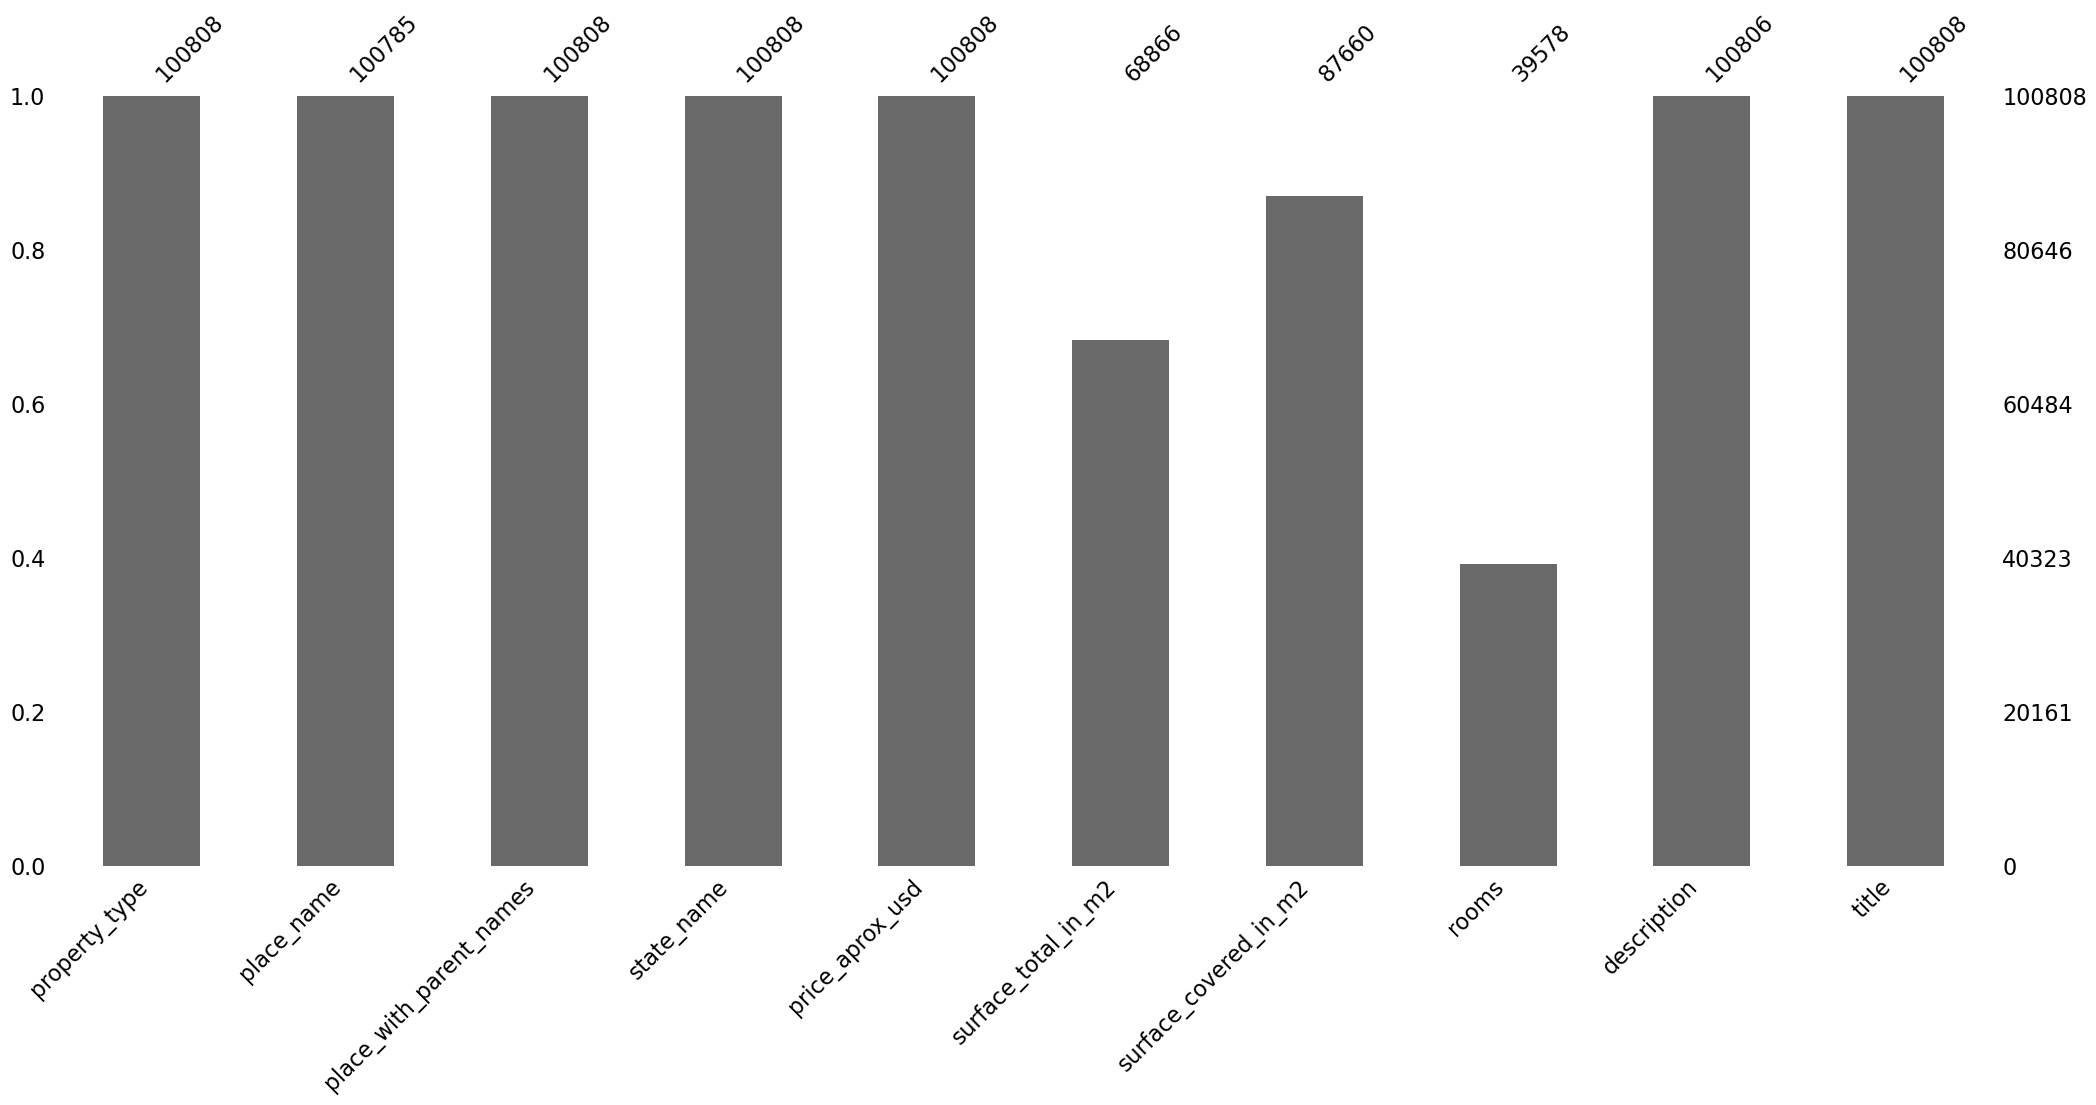

In [47]:
msno.bar(data)

In [53]:
data['property_type'].unique()

array(['apartment', 'house', 'store', 'PH'], dtype=object)

In [63]:
# Creamos dummies para el tipo de propiedad
dummies = pd.get_dummies(data['property_type'])
dummies

,PH,apartment,house,store
37914,0,1,0,0
107654,0,1,0,0
107653,0,1,0,0
107649,0,1,0,0
16012,0,0,1,0
...,...,...,...,...
43038,0,1,0,0
43037,1,0,0,0
43036,0,1,0,0
43033,0,1,0,0


In [66]:
propiedades = data.join(dummies)
propiedades.head(3)

,property_type,place_name,place_with_parent_names,state_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,description,title,PH,apartment,house,store
37914,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,56083.67,40.0,40.0,2.0,UNIDAD UBICADA EN PLANTA BAJA.LIVING-COMEDOR A...,DEPARTAMENTO 1 DORMITORIO APTO CREDITO ZONA FA...,0,1,0,0
107654,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,87421.44,45.0,37.0,NaN,Sergio Villella Inmobiliaria presenta departam...,Departamento - Macrocentro,0,1,0,0
107653,apartment,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Bs.As. G.B.A. Zona Norte,148573.84,NaN,49.0,NaN,Proyecto único en pozo con financiación en pes...,Departamento - Los Castaños,0,1,0,0


<AxesSubplot:>

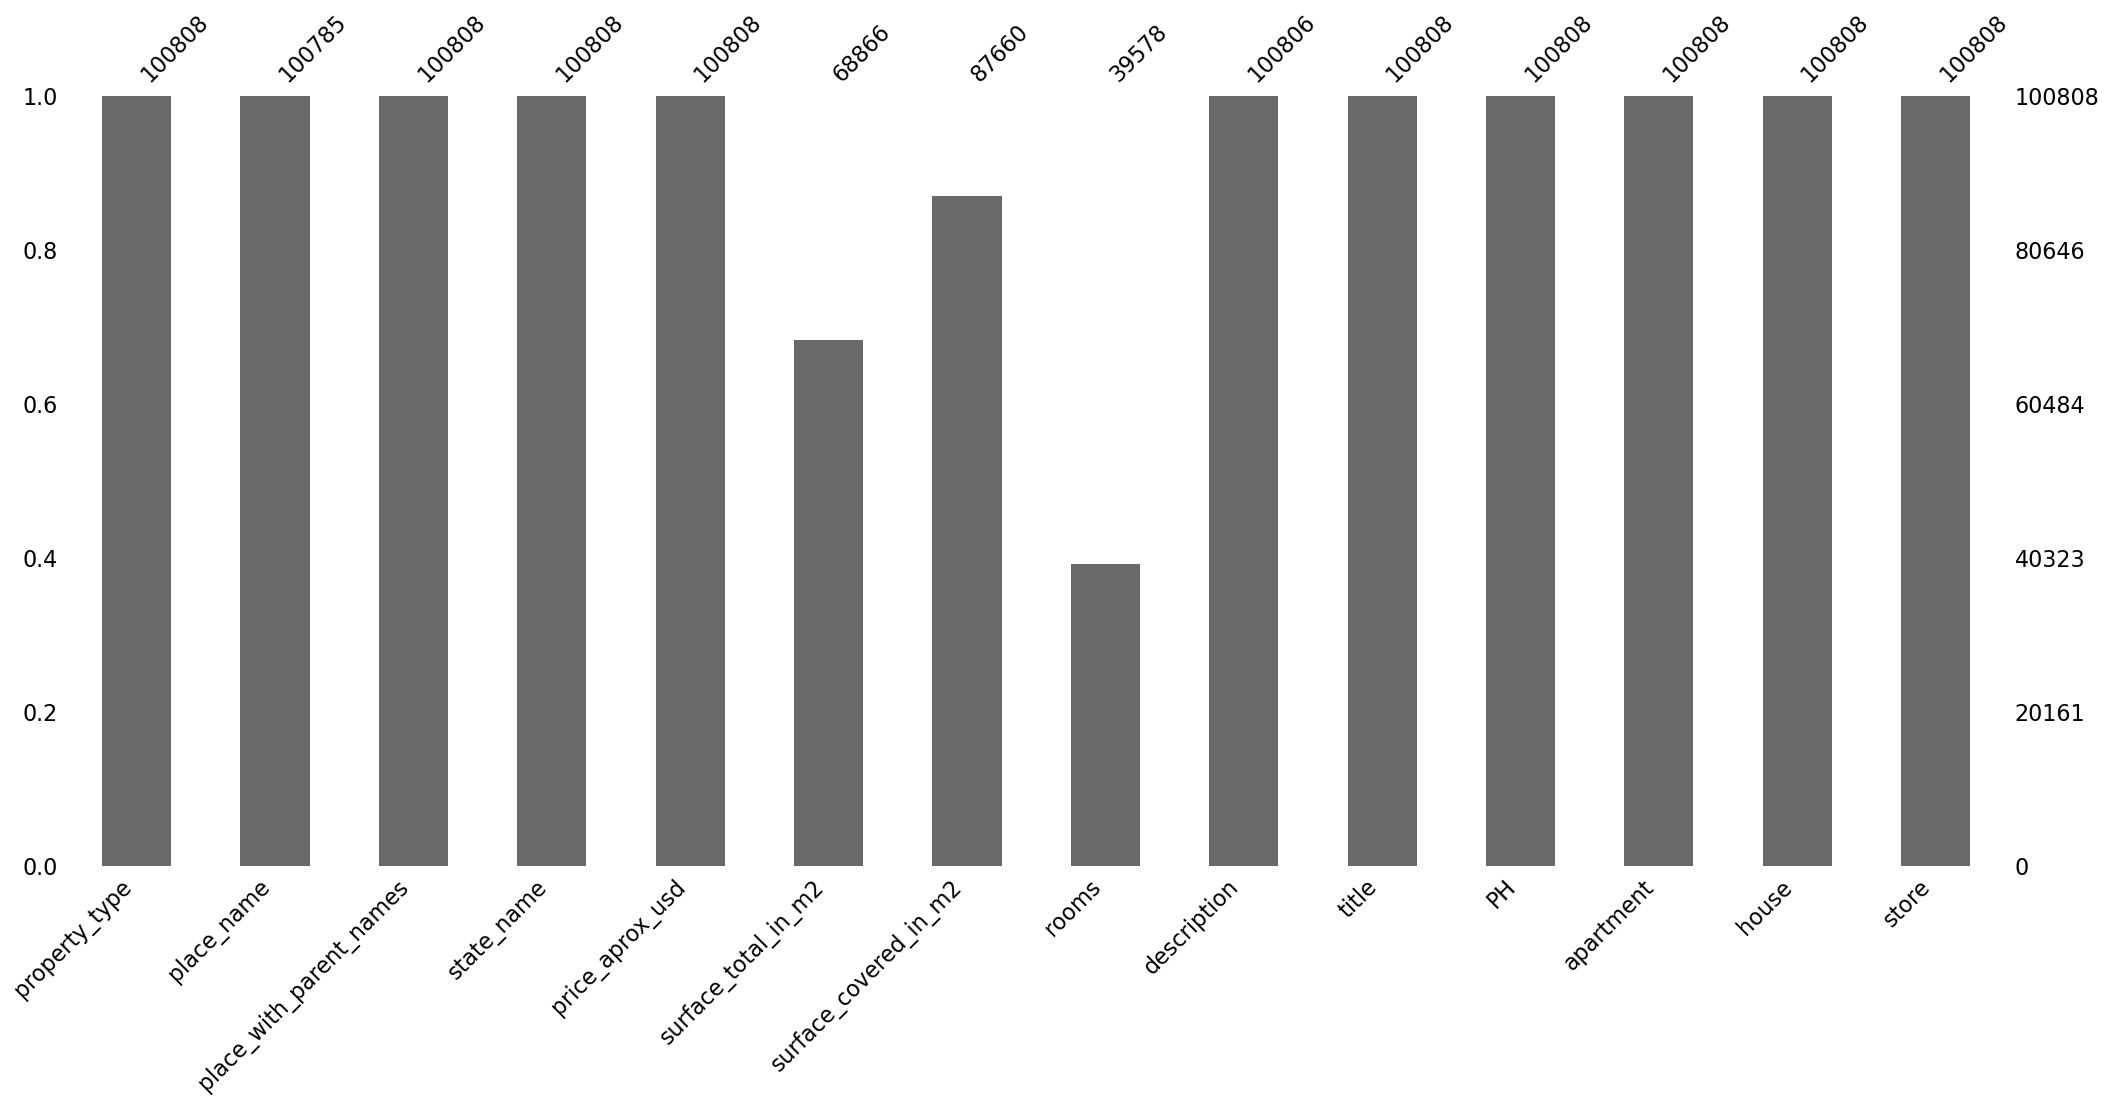

In [103]:
"""
despues de crear las dummies y analizar nuevamente los datos, se decide
eliminar las siguientes variables: property_type (ya se crearon dummies),
place_name, place_with_parent_names, state_name
"""
msno.bar(propiedades)

In [99]:
propiedades.iloc[1:15 , 4:8]


,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms
107654,87421.44,45.0,37.0,NaN
107653,148573.84,NaN,49.0,NaN
107649,66464.87,33.0,30.0,NaN
16012,8412.55,154.0,100.0,NaN
107645,86633.80,45.0,37.0,NaN
30209,40941.08,50.0,50.0,1.0
72443,18788.03,300.0,NaN,NaN
107638,65866.07,33.0,30.0,NaN
30208,27200.58,33.0,33.0,NaN
72448,568520.62,162.0,98.0,NaN


In [106]:
# Por su posible similitud, usaremos la superficie total y la 
# superficie cubierta para imputar los datos la una de la otra
# en los casos en que exista información en una pero no en la otra.

propiedades.fillna({'surface_total_in_m2': propiedades['surface_covered_in_m2']}, 
                    inplace=True)

propiedades.fillna({'surface_covered_in_m2': propiedades['surface_total_in_m2']}, 
                    inplace=True)

propiedades

,property_type,place_name,place_with_parent_names,state_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,description,title,PH,apartment,house,store
37914,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,56083.67,40.0,40.0,2.0,UNIDAD UBICADA EN PLANTA BAJA.LIVING-COMEDOR A...,DEPARTAMENTO 1 DORMITORIO APTO CREDITO ZONA FA...,0,1,0,0
107654,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,87421.44,45.0,37.0,NaN,Sergio Villella Inmobiliaria presenta departam...,Departamento - Macrocentro,0,1,0,0
107653,apartment,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Bs.As. G.B.A. Zona Norte,148573.84,49.0,49.0,NaN,Proyecto único en pozo con financiación en pes...,Departamento - Los Castaños,0,1,0,0
107649,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,66464.87,33.0,30.0,NaN,Sergio Villella Inmobiliaria presenta departam...,Departamento - Macrocentro,0,1,0,0
16012,house,Pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|,Bs.As. G.B.A. Zona Norte,8412.55,154.0,100.0,NaN,"EXCELENTE ACCESO Y UBICACIÓN SUPERFICIE : 413,...",OPORTUNIDAD CASA EN VENTA EN LOS ARCES. LA CAÑ...,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43038,apartment,Balvanera,|Argentina|Capital Federal|Balvanera|,Capital Federal,137000.00,54.0,54.0,3.0,"Venta - Departamento - Argentina, Buenos Aires...",Departamento en Venta ubicado en Balvanera,0,1,0,0
43037,PH,Villa Devoto,|Argentina|Capital Federal|Villa Devoto|,Capital Federal,85000.00,42.0,42.0,2.0,"Venta - Departamento - Argentina, Buenos Aires...",Departamento en Venta ubicado en Villa Devoto,1,0,0,0
43036,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Capital Federal,240000.00,57.0,57.0,4.0,"Venta - Departamento - Argentina, Buenos Aires...",Departamento en Venta ubicado en Palermo,0,1,0,0
43033,apartment,Martínez,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Bs.As. G.B.A. Zona Norte,120000.00,37.0,37.0,1.0,"Venta - Departamento - Argentina, Buenos Aires...",Departamento en Venta ubicado en Martínez,0,1,0,0


<AxesSubplot:>

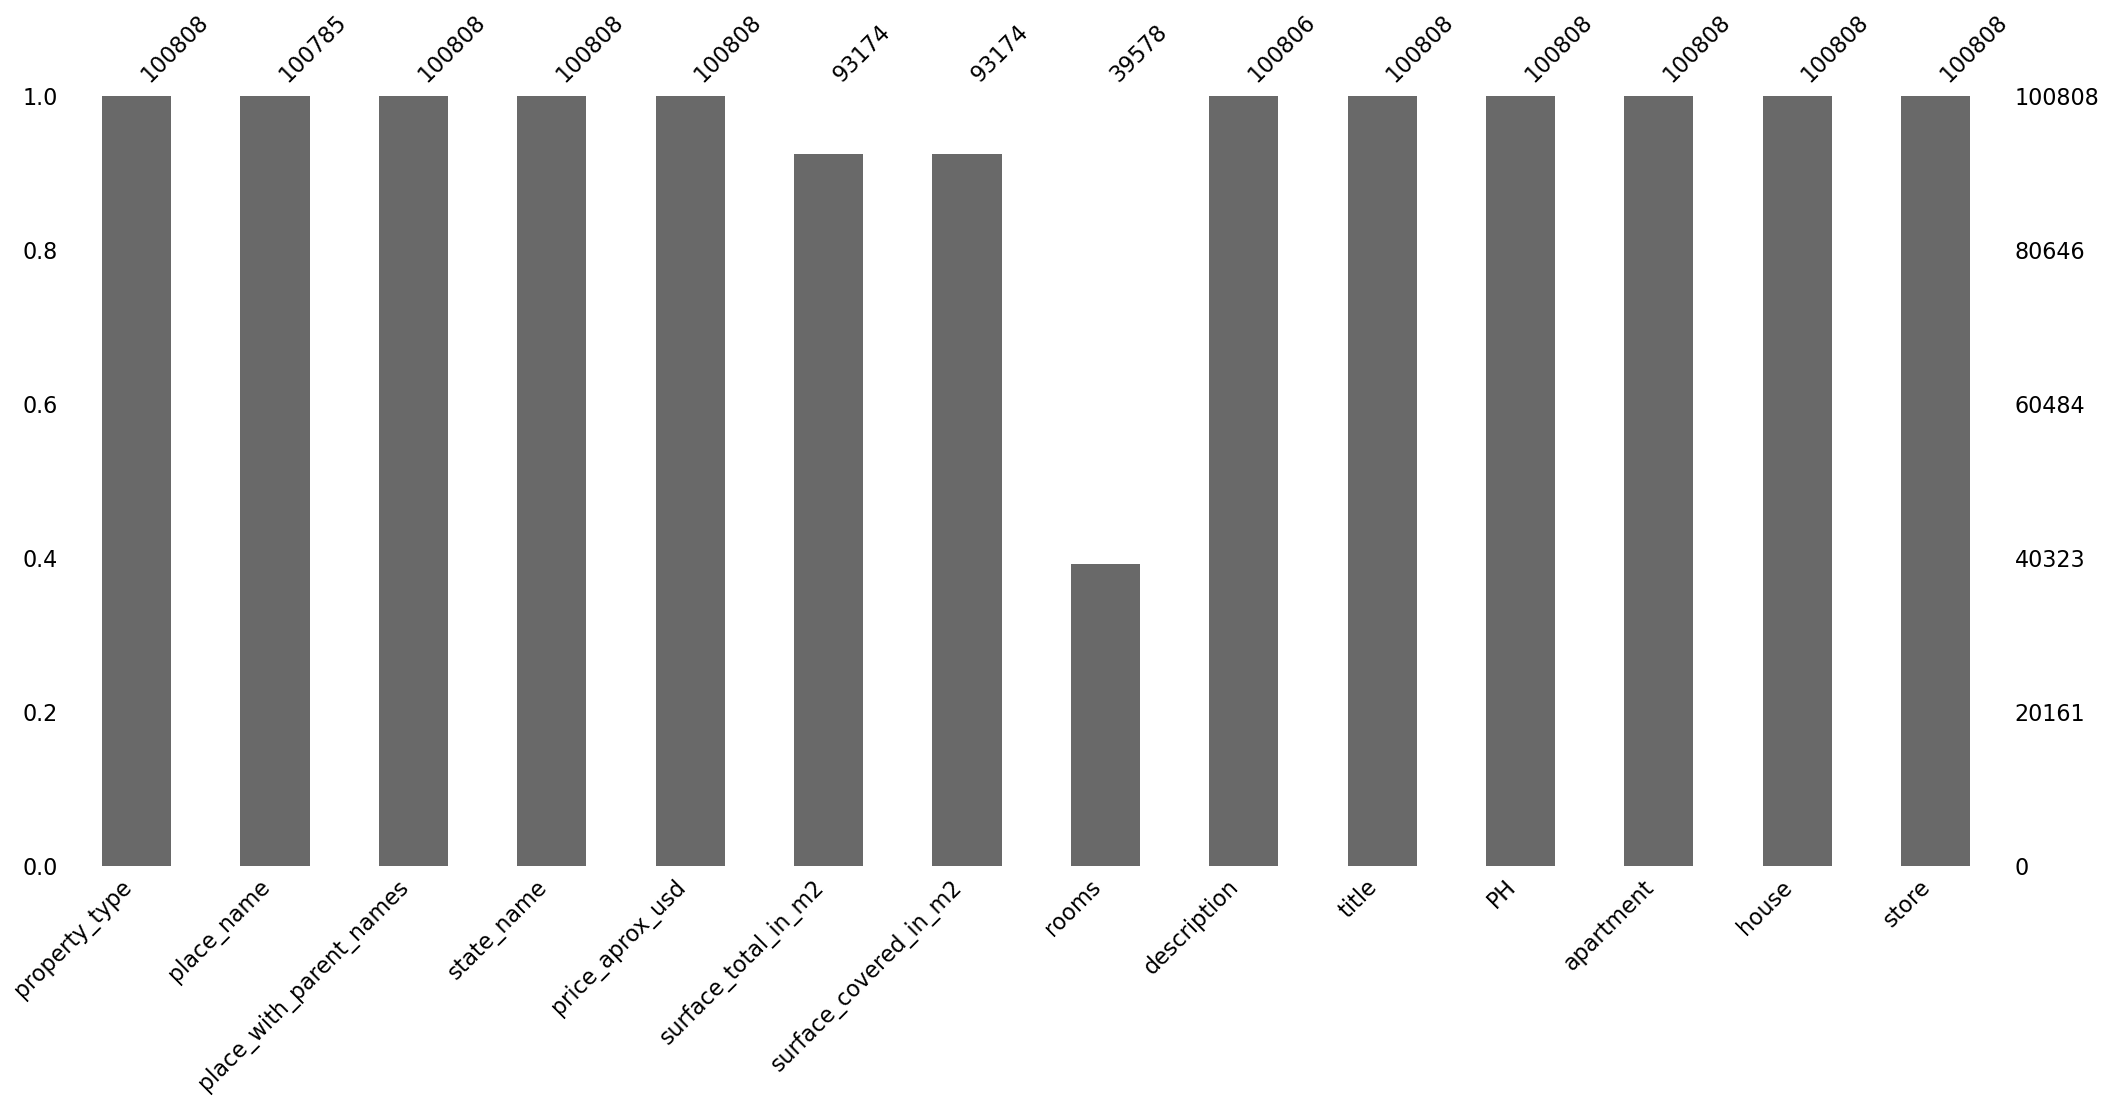

In [107]:
msno.bar(propiedades)

In [109]:
# Los pocos datos que faltan en las superficies se imputaran con la media.

propiedades.fillna({'surface_covered_in_m2': propiedades['surface_covered_in_m2'].mean()}, 
                    inplace=True)

propiedades.fillna({'surface_total_in_m2': propiedades['surface_total_in_m2'].mean()}, 
                    inplace=True)

<AxesSubplot:>

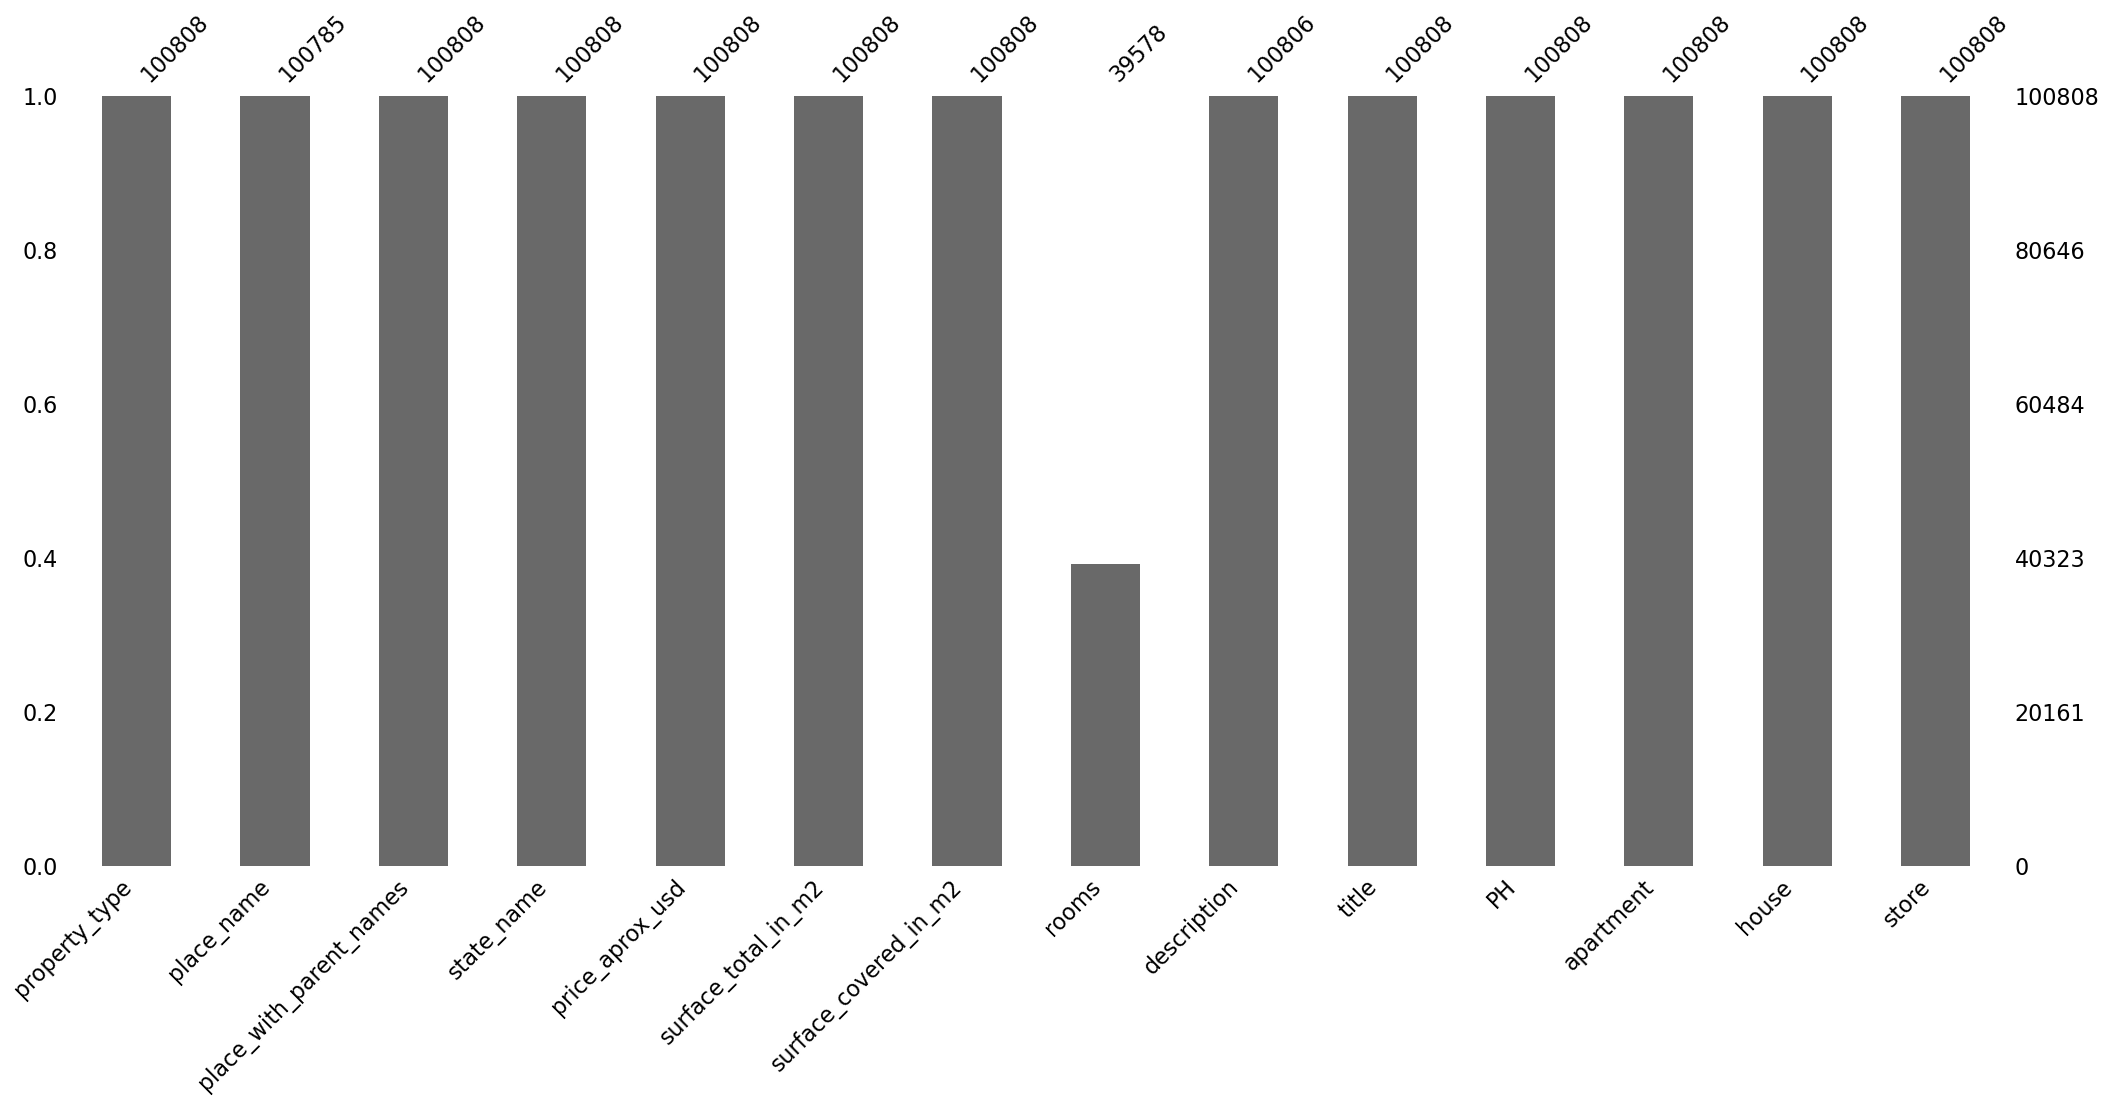

In [111]:
msno.bar(propiedades)

In [114]:
# Por ultimo, dropeamos la variable rooms por no contar con la 
# suficiente información para imputar los datos faltantes sin 
# afectar mucho a la regresión.

propiedades.drop('rooms', axis=1, inplace=True)
propiedades

,property_type,place_name,place_with_parent_names,state_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,description,title,PH,apartment,house,store
37914,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,56083.67,40.0,40.0,UNIDAD UBICADA EN PLANTA BAJA.LIVING-COMEDOR A...,DEPARTAMENTO 1 DORMITORIO APTO CREDITO ZONA FA...,0,1,0,0
107654,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,87421.44,45.0,37.0,Sergio Villella Inmobiliaria presenta departam...,Departamento - Macrocentro,0,1,0,0
107653,apartment,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Bs.As. G.B.A. Zona Norte,148573.84,49.0,49.0,Proyecto único en pozo con financiación en pes...,Departamento - Los Castaños,0,1,0,0
107649,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,66464.87,33.0,30.0,Sergio Villella Inmobiliaria presenta departam...,Departamento - Macrocentro,0,1,0,0
16012,house,Pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|,Bs.As. G.B.A. Zona Norte,8412.55,154.0,100.0,"EXCELENTE ACCESO Y UBICACIÓN SUPERFICIE : 413,...",OPORTUNIDAD CASA EN VENTA EN LOS ARCES. LA CAÑ...,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43038,apartment,Balvanera,|Argentina|Capital Federal|Balvanera|,Capital Federal,137000.00,54.0,54.0,"Venta - Departamento - Argentina, Buenos Aires...",Departamento en Venta ubicado en Balvanera,0,1,0,0
43037,PH,Villa Devoto,|Argentina|Capital Federal|Villa Devoto|,Capital Federal,85000.00,42.0,42.0,"Venta - Departamento - Argentina, Buenos Aires...",Departamento en Venta ubicado en Villa Devoto,1,0,0,0
43036,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Capital Federal,240000.00,57.0,57.0,"Venta - Departamento - Argentina, Buenos Aires...",Departamento en Venta ubicado en Palermo,0,1,0,0
43033,apartment,Martínez,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Bs.As. G.B.A. Zona Norte,120000.00,37.0,37.0,"Venta - Departamento - Argentina, Buenos Aires...",Departamento en Venta ubicado en Martínez,0,1,0,0


<AxesSubplot:>

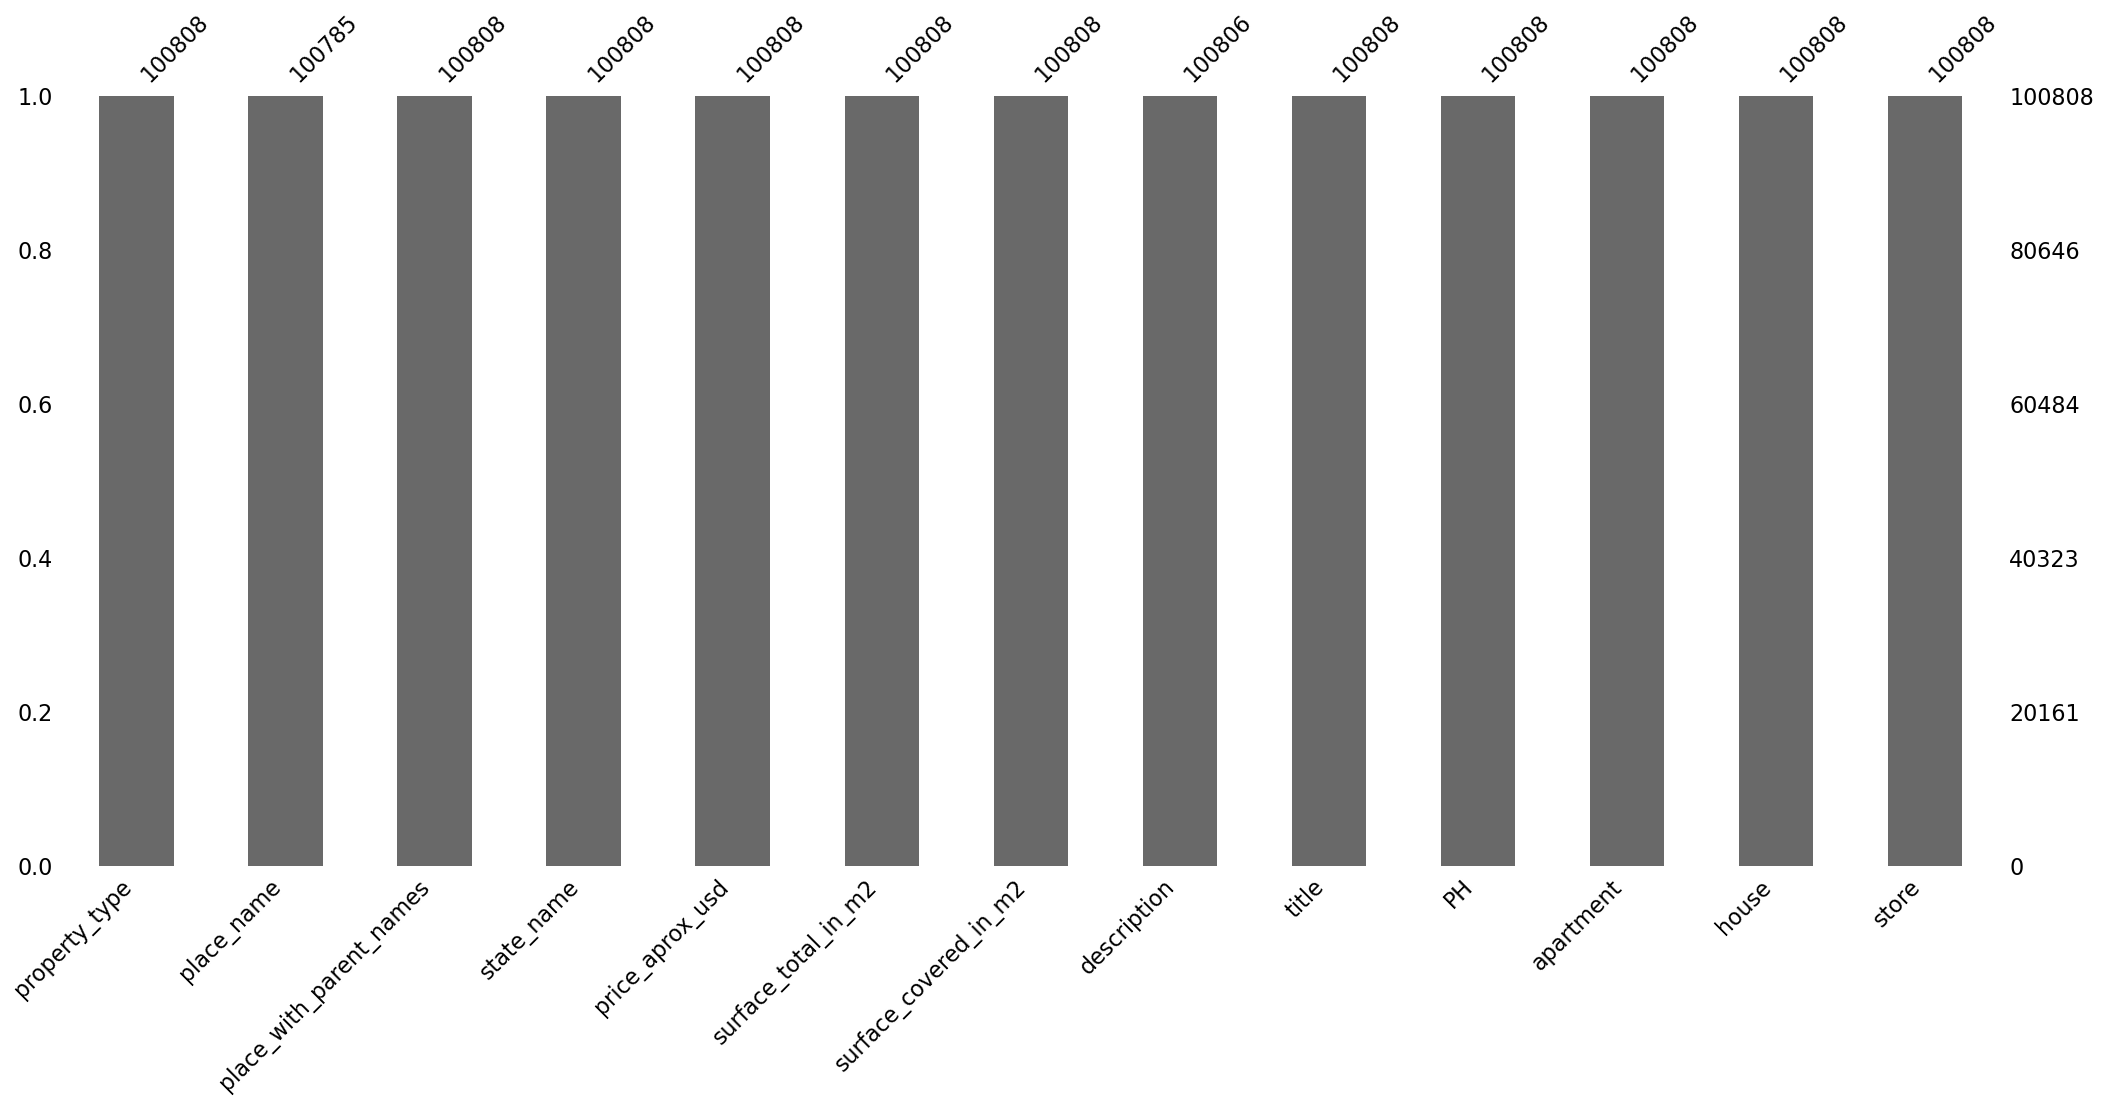

In [115]:
msno.bar(propiedades)